In [1]:
# Ravi Patel
# Additional things to take a look at:
# - k-fold cv
# - normalization/standardization though, this might not have a huge effect given the distributed of the predictors
# - use pipeline to clean up
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('dataset/train.csv')
del df['ID_code']
y = df['target']
del df['target']
ones = pd.DataFrame(np.ones(df.shape[0]))
ones.columns = ['intercept']
new_df = pd.concat([ones, df], axis=1)
X_train, X_test, y_train, y_test = train_test_split(new_df, y)

In [3]:
X_train

,intercept,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
149414,1.0,6.8756,3.3692,15.0638,10.0248,8.6425,-11.6449,6.8336,14.6992,5.4367,...,2.1183,8.1136,1.6445,3.7760,17.2799,1.2811,7.9006,7.4076,15.2218,-2.4950
116221,1.0,10.6856,1.2458,6.4372,4.4650,11.9804,-16.4161,6.0903,17.4520,5.0999,...,8.6685,10.6282,0.2953,3.0384,14.5207,-1.2433,0.9550,9.5829,14.0202,1.9874
34690,1.0,9.9056,1.0257,8.8206,5.6393,14.0764,-19.4259,6.2593,13.4238,0.9533,...,-1.8282,5.9470,4.0396,8.3790,13.6820,-3.3115,3.5586,8.5400,17.9410,-11.9234
139058,1.0,5.7295,-2.4800,11.1947,3.1172,11.8235,-1.5035,5.8980,15.5166,5.2898,...,7.9672,6.8217,3.7886,2.9270,15.3773,0.3844,8.1997,8.7769,18.3555,7.1992
135369,1.0,11.5905,-2.6521,17.7866,4.5861,11.5317,-3.8914,7.0788,10.1654,-3.2500,...,1.3249,11.6138,0.7614,-5.3258,19.6765,-0.2777,8.3975,8.3707,17.2349,-0.5209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36322,1.0,10.4048,2.1796,12.2311,4.7997,13.2106,-13.8456,5.3048,17.5764,-1.8033,...,11.0216,5.2795,4.0305,2.1786,16.1944,-0.8463,-0.7224,8.8779,12.2861,14.3317
86222,1.0,13.7614,0.0168,8.7423,6.5488,12.9220,-5.6184,4.8233,16.8766,-2.5347,...,5.5039,13.1738,3.8427,2.1734,12.7191,-0.1844,-6.3785,8.8745,11.4478,-10.2496
4206,1.0,7.8177,-7.2498,11.4129,5.1054,12.4630,-1.3627,5.4078,17.7102,-1.3958,...,9.0600,8.1602,2.0865,8.6270,14.8525,-1.5229,4.2380,9.5866,15.0126,-18.6959
11537,1.0,7.6511,-4.8279,15.8535,7.3239,8.6242,-11.1918,6.1204,16.8839,4.2764,...,-1.1328,3.0330,-0.8333,0.2604,17.6268,-0.5375,5.9709,10.2832,15.0056,-0.2383


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'var_0'}>,
        <Axes: title={'center': 'var_1'}>,
        <Axes: title={'center': 'var_2'}>,
        <Axes: title={'center': 'var_3'}>,
        <Axes: title={'center': 'var_4'}>,
        <Axes: title={'center': 'var_5'}>,
        <Axes: title={'center': 'var_6'}>,
        <Axes: title={'center': 'var_7'}>,
        <Axes: title={'center': 'var_8'}>,
        <Axes: title={'center': 'var_9'}>,
        <Axes: title={'center': 'var_10'}>,
        <Axes: title={'center': 'var_11'}>,
        <Axes: title={'center': 'var_12'}>],
       [<Axes: title={'center': 'var_13'}>,
        <Axes: title={'center': 'var_14'}>,
        <Axes: title={'center': 'var_15'}>,
        <Axes: title={'center': 'var_16'}>,
        <Axes: title={'center': 'var_17'}>,
        <Axes: title={'center': 'var_18'}>,
        <Axes: title={'center': 'var_19'}>,
        <Axes: title={'center': 'var_20'}>,
        <Axes: title={'center': 'var_2

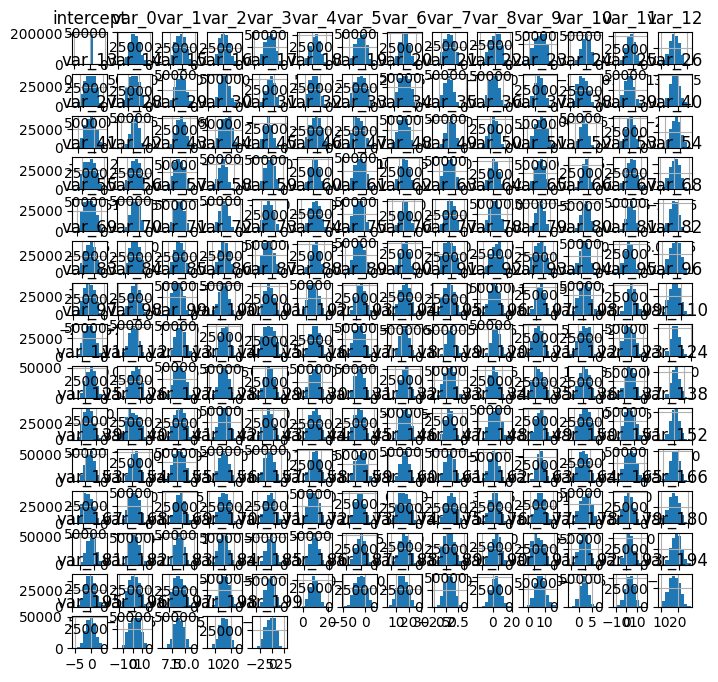

In [4]:
new_df.hist(figsize=(8,8))

In [5]:
# This is pretty messy but overall we can see that the data is normally distributed.
# There are 200 columns so looking at corr might be a bit cumbersome so let's use Logistic Regression to see what we can find out.

In [6]:
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
model = glm.fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:               150000
Model:                            GLM   Df Residuals:                   149799
Model Family:                Binomial   Df Model:                          200
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34700.
Date:                Mon, 25 Sep 2023   Deviance:                       69401.
Time:                        17:39:40   Pearson chi2:                 1.64e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1740
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     57.5672      7.134      8.070      0.000      43.586      71.549
var_0          0.0541      0.003     16.763      0.000       0.048       0.060
var_1          0.0386      0.002     15.703      0.000       0.034       0.043
var_2          0.0652      0.004     17.544      0.000       0.058       0.072
var_3          0.0140      0.005      2.864      0.004       0.004       0.024
var_4          0.0203      0.006      3.306      0.001       0.008       0.032
var_5          0.0138      0.001     10.842      0.000       0.011       0.016
var_6          0.2513      0.011     22.084      0.000       0.229       0.274
var_7          0.0007      0.003      0.223      0.824      -0.005       0.006
var_8          0.0204      0.003      6.771      0.000       0.014       0.026
var_9         -0.1105      0.008    -13.772      0.000      -0.126      -0.095
var_10        -0.0003      0.002     -0.138      0.890      -0.004       0.003
var_11         0.0144      0.002      8.678      0.000       0.011       0.018
var_12        -1.1788      0.052    -22.819      0.000      -1.280      -1.078
var_13        -0.0375      0.002    -17.621      0.000      -0.042      -0.033
var_14        -0.0091      0.004     -2.058      0.040      -0.018      -0.000
var_15         0.1285      0.024      5.297      0.000       0.081       0.176
var_16         0.0070      0.004      1.808      0.071      -0.001       0.015
var_17        -0.0002      0.001     -0.102      0.919      -0.003       0.003
var_18         0.0181      0.001     14.313      0.000       0.016       0.021
var_19         0.0042      0.001      3.370      0.001       0.002       0.007
var_20        -0.0108      0.002     -6.324      0.000      -0.014      -0.007
var_21        -0.0222      0.001    -18.253      0.000      -0.025      -0.020
var_22         0.0693      0.003     20.009      0.000       0.062       0.076
var_23        -0.1511      0.019     -7.975      0.000      -0.188      -0.114
var_24         0.0246      0.003      9.359      0.000       0.019       0.030
var_25         0.1452      0.035      4.170      0.000       0.077       0.213
var_26         0.0344      0.002     20.740      0.000       0.031       0.038
var_27        -0.0078      0.007     -1.189      0.235      -0.021       0.005
var_28        -0.1028      0.013     -8.061      0.000      -0.128      -0.078
var_29         0.0070      0.004      1.830      0.067      -0.000       0.014
var_30        -0.0005      0.001     -0.405      0.686      -0.003       0.002
var_31        -0.0428      0.005     -9.216      0.000      -0.052      -0.034
var_32         0.0404      0.004     10.470      0.000       0.033       0.048
var_33        -0.0346      0.002    -14.884      0.000      -0.039      -0.030
var_34        -0.3320      0.018    -18.028      0.000      -0.368      -0.296
va

In [8]:
preds = np.round(model.predict(X_test))
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     45027
           1       0.69      0.27      0.39      4973

    accuracy                           0.92     50000
   macro avg       0.80      0.63      0.67     50000
weighted avg       0.90      0.92      0.90     50000



In [9]:
# Looks like we have a few columns in which we have strong indication that the null hypothesis is probable.

In [11]:
del X_train['intercept']
del X_test['intercept']
pca = PCA(n_components=50)
pca.fit(X_train, y_train)
pca.components_.shape

(50, 200)

In [12]:
pca.explained_variance_ratio_.cumsum()
# Looks like if we used k = 49, we could retain 72% of the variance of the dataset which probably isn't what we are looking for.
# We could adjust the number of components.

array([0.07145074, 0.10259497, 0.13024995, 0.15713446, 0.18200513,
       0.20481893, 0.22708599, 0.24814927, 0.26898584, 0.28917987,
       0.3076097 , 0.3250549 , 0.34205577, 0.35885359, 0.37560755,
       0.38915507, 0.40226132, 0.41476421, 0.42708778, 0.43915772,
       0.45086977, 0.46242871, 0.47386935, 0.48519996, 0.49641218,
       0.50743462, 0.51817584, 0.52883843, 0.53929787, 0.54971117,
       0.55969889, 0.56958279, 0.57940451, 0.58901523, 0.59859077,
       0.60815556, 0.6176749 , 0.62712308, 0.63644287, 0.64554587,
       0.65454518, 0.66348375, 0.67222616, 0.68088842, 0.6894926 ,
       0.69793732, 0.70628765, 0.71414956, 0.72112421, 0.72797759])